In [70]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import dataframe_image as dfi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [26]:
data_df = pd.read_csv('simple_data.csv')

In [27]:
data_df

,Country,Max_owid_total_cases_per_million,Max_owid_total_deaths_per_million,death_per_cases_per_million,Max_owid_population_density,Max_owid_median_age,Max_owid_aged_65_older,Max_owid_extreme_poverty,Max_owid_gdp_per_capita,Max_owid_hospital_beds_per_thousand,Max_owid_population,Max_owid_stringency_index,Count_sdsn_overall_transmission
0,Mexico,7079.75,704.03,0.099,66.44,29.3,6.857,2.5,17336.47,1.38,128932753.0,82.41,284.0
1,Italy,10198.09,630.51,0.062,205.86,47.9,23.021,2.0,35220.08,3.18,60461828.0,93.52,243.0
2,Bolivia,12120.59,745.74,0.062,10.20,25.4,6.704,7.1,6885.83,1.10,11673029.0,96.30,224.0
3,Fiji,37.93,2.23,0.059,49.56,28.6,6.224,1.4,8702.98,2.30,896444.0,88.89,218.0
4,"Iran, Islamic Rep.",7107.04,406.14,0.057,49.83,32.4,5.440,0.2,19082.62,1.50,83992953.0,70.83,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Maldives,21489.54,68.45,0.003,1454.43,30.6,4.120,NaN,15183.62,NaN,540542.0,NaN,222.0
107,Iceland,13828.57,35.17,0.003,3.40,37.3,14.431,0.2,46482.96,2.91,341250.0,53.70,238.0
108,Sri Lanka,457.24,0.89,0.002,341.96,34.1,10.069,0.7,11669.08,3.60,21413250.0,100.00,239.0
109,Qatar,45868.53,80.18,0.002,227.32,31.9,1.307,NaN,116935.60,1.20,2881060.0,86.11,226.0


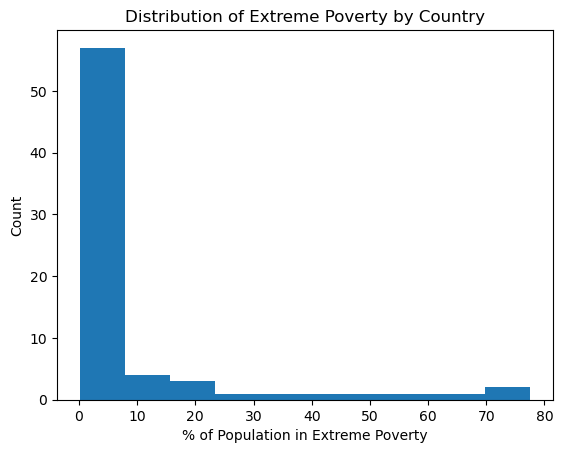

In [38]:
plt.hist(data_df[' Max_owid_extreme_poverty '])
plt.title('Distribution of Extreme Poverty by Country')
plt.xlabel('% of Population in Extreme Poverty')
plt.ylabel('Count')
plt.savefig('Distribution of Extreme Poverty Limited Countries.png')

In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                111 non-null    object 
 1    Max_owid_total_cases_per_million      111 non-null    float64
 2    Max_owid_total_deaths_per_million     111 non-null    float64
 3    death_per_cases_per_million           111 non-null    float64
 4    Max_owid_population_density           111 non-null    float64
 5    Max_owid_median_age                   109 non-null    float64
 6    Max_owid_aged_65_older                109 non-null    float64
 7    Max_owid_extreme_poverty              81 non-null     float64
 8    Max_owid_gdp_per_capita               111 non-null    float64
 9    Max_owid_hospital_beds_per_thousand   101 non-null    float64
 10   Max_owid_population                   111 non-null    float64
 11   Max_o

In [16]:
columns = data_df.columns
columns

Index(['Country', ' Max_owid_total_cases_per_million ',
       ' Max_owid_total_deaths_per_million ', ' death_per_cases_per_million ',
       ' Max_owid_population_density ', ' Max_owid_median_age ',
       ' Max_owid_aged_65_older ', ' Max_owid_extreme_poverty ',
       ' Max_owid_gdp_per_capita ', ' Max_owid_hospital_beds_per_thousand ',
       ' Max_owid_population ', ' Max_owid_stringency_index ',
       'Count_sdsn_overall_transmission'],
      dtype='object')

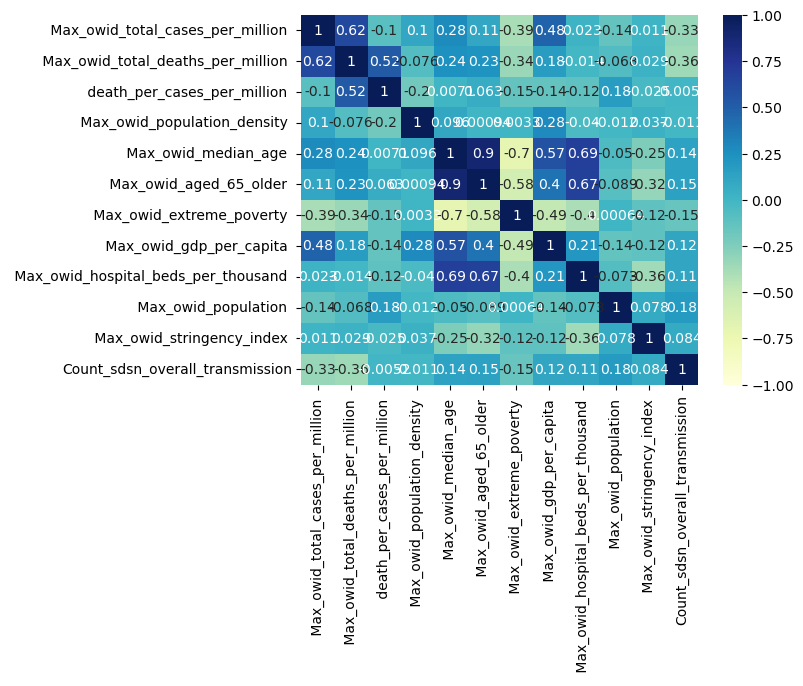

In [21]:
dataplot = sns.heatmap(data_df.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.show()

In [34]:
clean_df = data_df
clean_df = clean_df.drop(columns = ' Max_owid_median_age ')
clean_df= clean_df.drop(columns = ' Max_owid_aged_65_older ')
clean_df.dropna(inplace = True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                72 non-null     object 
 1    Max_owid_total_cases_per_million      72 non-null     float64
 2    Max_owid_total_deaths_per_million     72 non-null     float64
 3    death_per_cases_per_million           72 non-null     float64
 4    Max_owid_population_density           72 non-null     float64
 5    Max_owid_extreme_poverty              72 non-null     float64
 6    Max_owid_gdp_per_capita               72 non-null     float64
 7    Max_owid_hospital_beds_per_thousand   72 non-null     float64
 8    Max_owid_population                   72 non-null     float64
 9    Max_owid_stringency_index             72 non-null     float64
 10  Count_sdsn_overall_transmission        72 non-null     float64
dtypes: floa

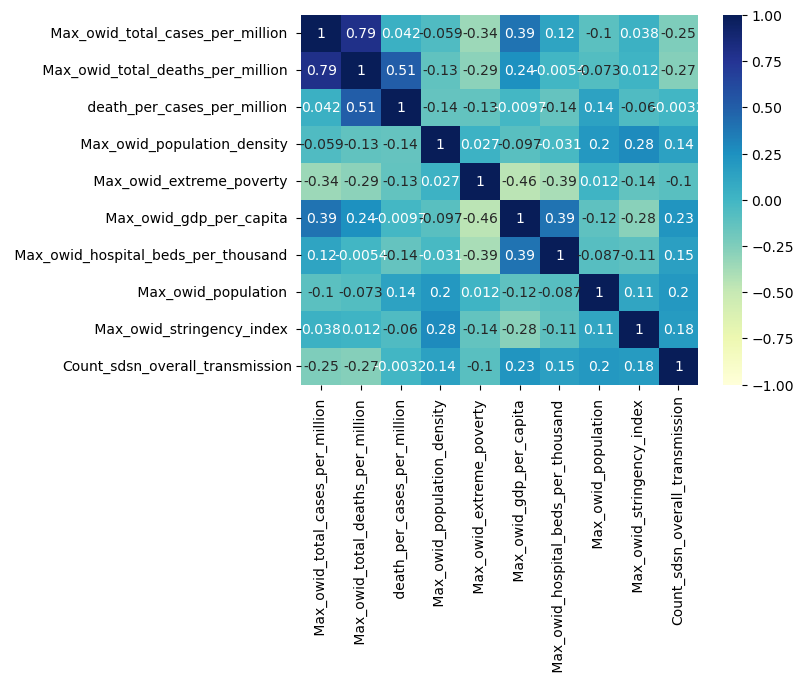

In [35]:
dataplot = sns.heatmap(clean_df.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.show()

In [80]:
df200 = pd.read_csv('greater than 200.csv')
clean_df200 = df200[['deaths_per_case', ' Max of owid_population_density ', ' Max of owid_median_age ',
                   ' Max of owid_gdp_per_capita ', ' Max of owid_hospital_beds_per_thousand ',
                   ' Max of owid_stringency_index ', 'Sum of sdsn_overall_transmission']]
clean_df200.dropna(inplace = True)

/var/folders/7j/zs8rg5b55zzfgwqhb9y26nsw0000gn/T/ipykernel_99486/2600110491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df200.dropna(inplace = True)


In [136]:
y = clean_df200['deaths_per_case'].to_numpy()
x1 = clean_df200[' Max of owid_median_age '].to_numpy().reshape(-1,1)
x2 = clean_df200[' Max of owid_gdp_per_capita '].to_numpy().reshape(-1,1)
x3 = clean_df200[' Max of owid_hospital_beds_per_thousand '].to_numpy().reshape(-1,1)
x4 = clean_df200[' Max of owid_stringency_index '].to_numpy().reshape(-1,1)
x5 = clean_df200['Sum of sdsn_overall_transmission'].to_numpy().reshape(-1,1)
x = np.concatenate([x1,x2,x3,x4,x5], axis=1)

0.02407882495830981
[-1.4111563e-07]
0.06655371597436877


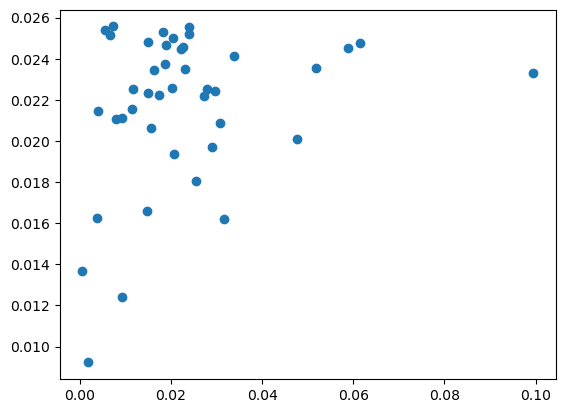

In [99]:
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x2,y)
reg.fit(X_train, y_train)
rmse = mean_squared_error(reg.predict(X_test), y_test, squared = False)
betas = reg.coef_
print(rmse)
print(betas)
y_hat = reg.predict(x2)
r2 = r2_score(y,y_hat)
print(r2)
plt.scatter(y,y_hat)
plt.show()

0.013876053573584847
[-1.14144275e-06  9.39116826e-04 -4.50976082e-07 -3.22193106e-03
 -4.95183632e-04  2.28215259e-05]
0.2385944835219186


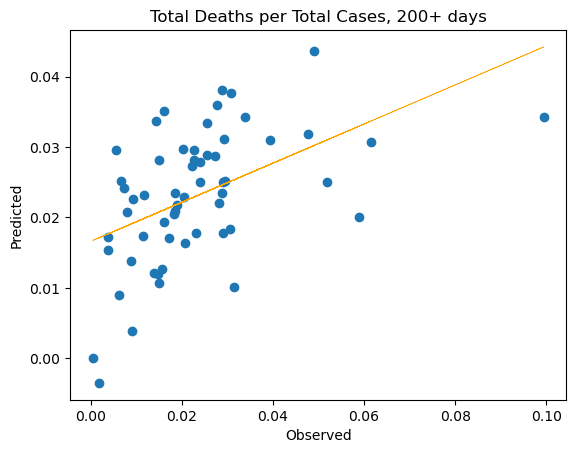

In [159]:
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x,y)
reg.fit(X_train, y_train)
rmse = mean_squared_error(reg.predict(X_test), y_test, squared = False)
betas = reg.coef_
print(rmse)
print(betas)
y_hat = reg.predict(x)
r2 = r2_score(y,y_hat)
print(r2)

slope, intercept, r_value, p_value, std_err = stats.linregress(y,y_hat)
y_hat_plot = slope*y + intercept
plt.scatter(y,y_hat)
plt.plot(y, y_hat_plot, color='orange', linewidth=0.5)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Total Deaths per Total Cases, 200+ days')
plt.savefig('200 prediction vs observation2.png')
plt.show()

In [157]:
y_hat_plot = float(reg.coef_)*x + reg.intercept_
plt.plot(x, y, 'o', ms=2)
plt.plot(x, y_hat, color='orange', linewidth=0.5) # orange line for the fox
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

Lasso(alpha=0.02040817306122449)
0.018612913494220226
[ 0.00000000e+00 -3.31942958e-07 -0.00000000e+00 -4.66733371e-04
  3.84136442e-05]
0.10910757093499901


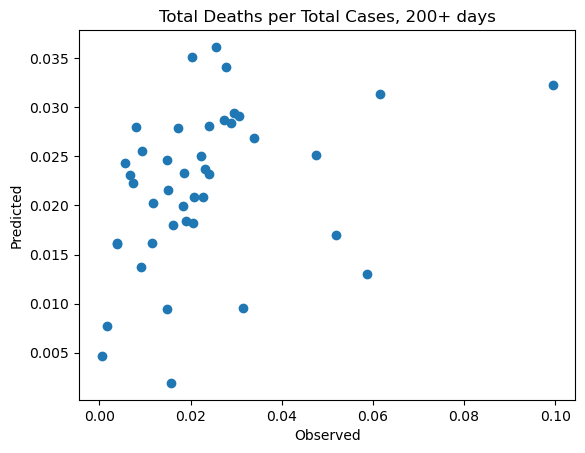

In [148]:
model = Lasso()
Lasso_reg= GridSearchCV(model, Lasso_parameters, scoring='neg_mean_squared_error',cv=5)
Lasso_reg.fit(x,y)
X_train, X_test, y_train, y_test = train_test_split(x,y)
model = Lasso_reg.best_estimator_
print(model)
model.fit(X_train, y_train)
rmse = mean_squared_error(model.predict(X_test), y_test, squared = False)
betas = model.coef_
print(rmse)
print(betas)
y_hat = model.predict(x)
r2 = r2_score(y,y_hat)
print(r2)
plt.scatter(y,y_hat)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Total Deaths per Total Cases, 200+ days')
plt.savefig('200 prediction vs observation2.png')
plt.show()

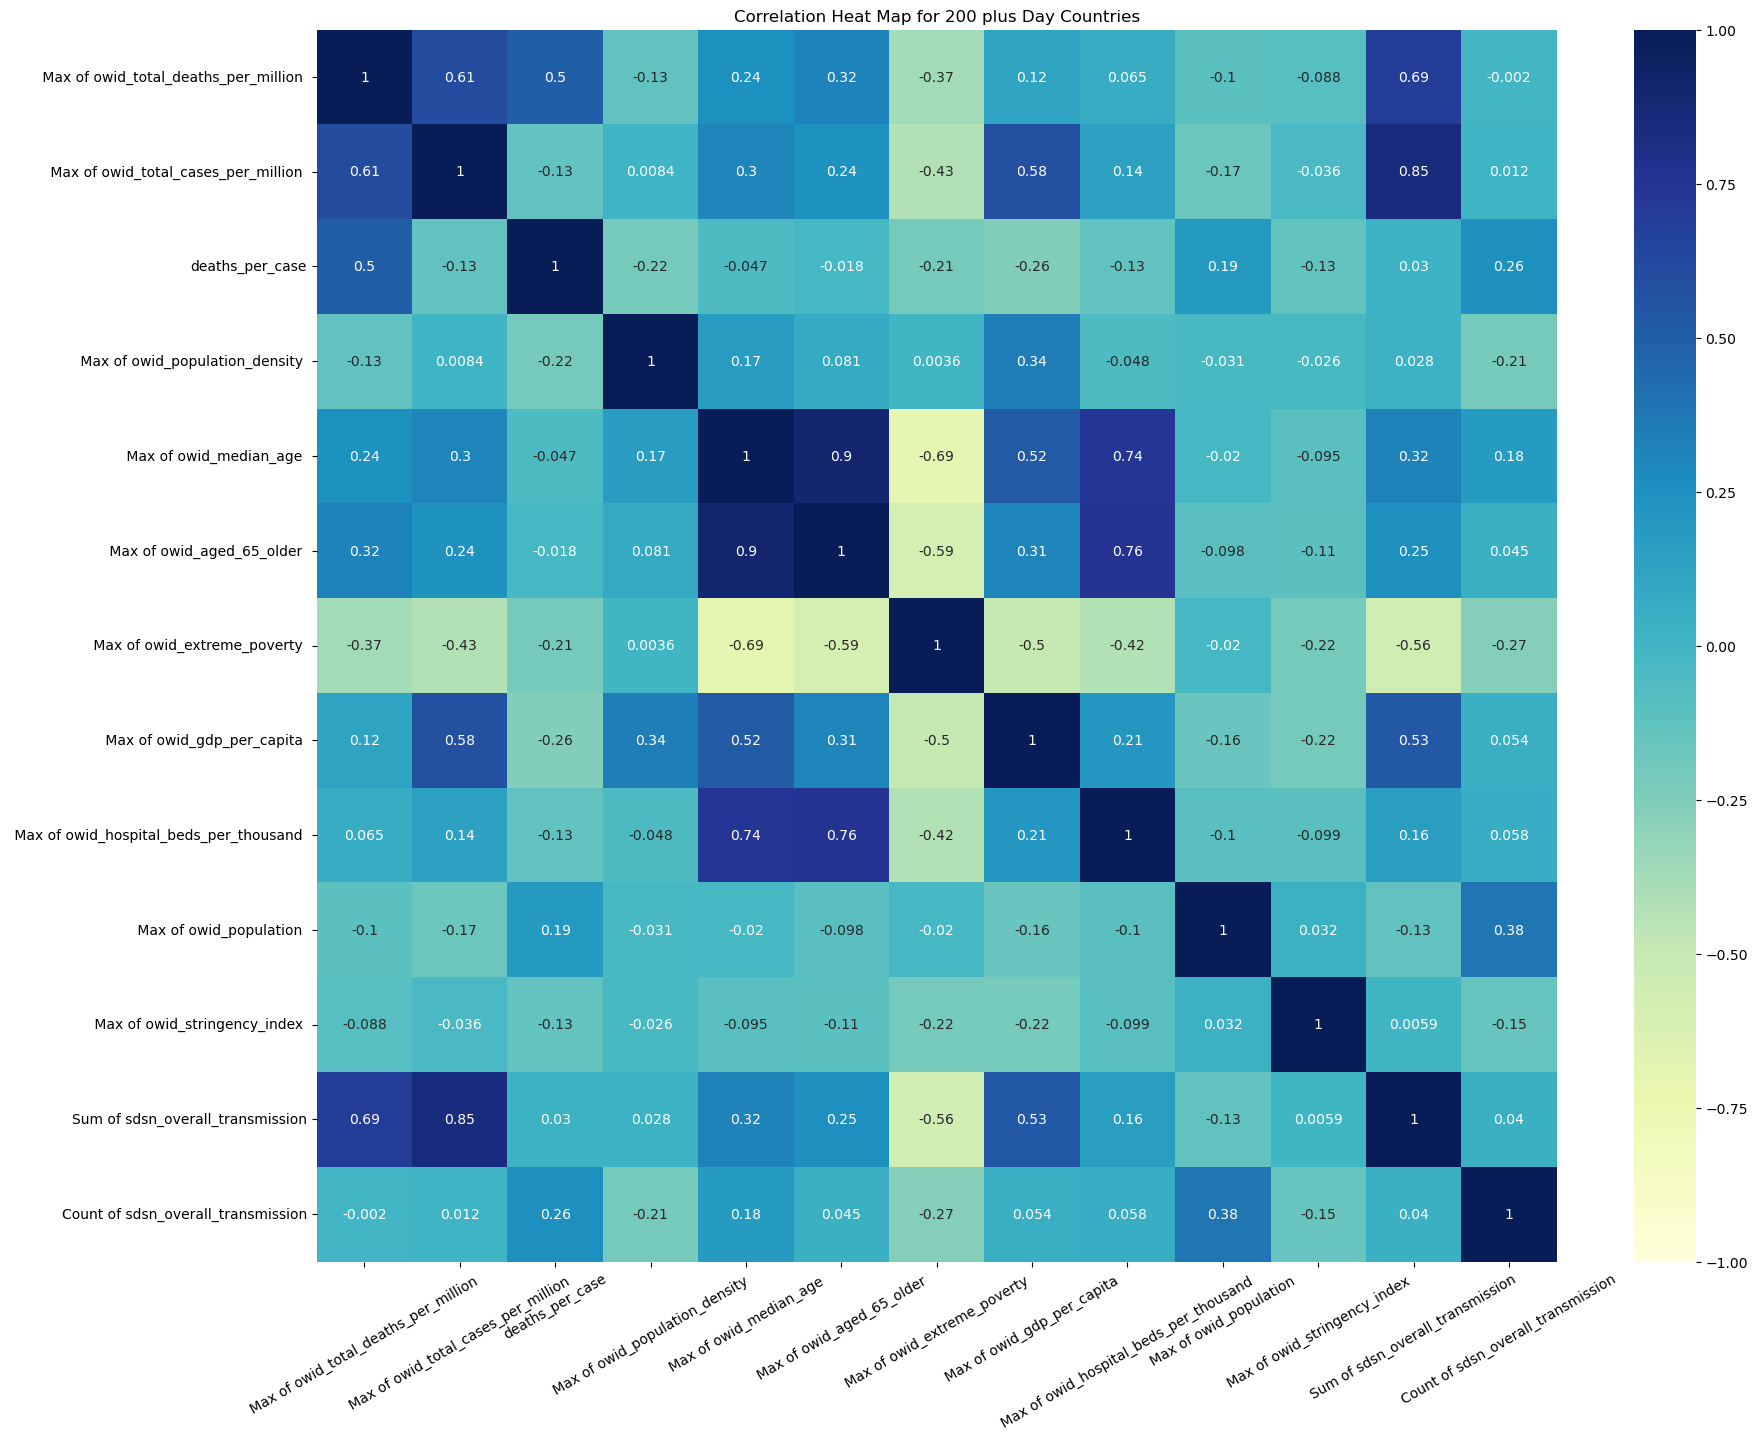

In [57]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(16)
dataplot = sns.heatmap(df200.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title('Correlation Heat Map for 200 plus Day Countries')
plt.xticks(rotation=30)
plt.savefig('correlation heat map 200 countries')
plt.show()

In [63]:
columns100 = df100.columns
columns100

Index(['Row Labels', ' Max of owid_total_deaths_per_million ',
       ' Max of owid_total_cases_per_million ', 'deaths_per_case',
       ' Max of owid_population_density ', ' Max of owid_median_age ',
       ' Max of owid_aged_65_older ', ' Max of owid_extreme_poverty ',
       ' Max of owid_gdp_per_capita ',
       ' Max of owid_hospital_beds_per_thousand ', ' Max of owid_population ',
       ' Max of owid_stringency_index ', 'Sum of sdsn_overall_transmission',
       'Count of sdsn_overall_transmission'],
      dtype='object')

In [65]:
df100 = pd.read_csv('less than 200.csv')
clean_df100 = df100[['deaths_per_case', ' Max of owid_population_density ', ' Max of owid_median_age ',
                   ' Max of owid_gdp_per_capita ', ' Max of owid_hospital_beds_per_thousand ',
                   ' Max of owid_stringency_index ', 'Sum of sdsn_overall_transmission']]
clean_df100.dropna(inplace = True)

/var/folders/7j/zs8rg5b55zzfgwqhb9y26nsw0000gn/T/ipykernel_99486/397411765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df100.dropna(inplace = True)


In [160]:
y = clean_df100['deaths_per_case'].to_numpy()
x1 = clean_df100[' Max of owid_population_density '].to_numpy().reshape(-1,1)
x2 = clean_df100[' Max of owid_median_age '].to_numpy().reshape(-1,1)
x3 = clean_df100[' Max of owid_gdp_per_capita '].to_numpy().reshape(-1,1)
x4 = clean_df100[' Max of owid_hospital_beds_per_thousand '].to_numpy().reshape(-1,1)
x5 = clean_df100[' Max of owid_stringency_index '].to_numpy().reshape(-1,1)
x6 = clean_df100['Sum of sdsn_overall_transmission'].to_numpy().reshape(-1,1)
x = np.concatenate([x1,x2,x3,x4,x5,x6], axis=1)


In [130]:
Lasso_parameters = {'alpha':np.linspace(.00000001,1)}

Lasso(alpha=1e-08)
0.006353780237540626
[-2.68178296e-05  1.64922990e-03 -3.30744513e-07 -4.53954903e-03
 -1.69361192e-04 -5.98135968e-07]
0.5465196683865258


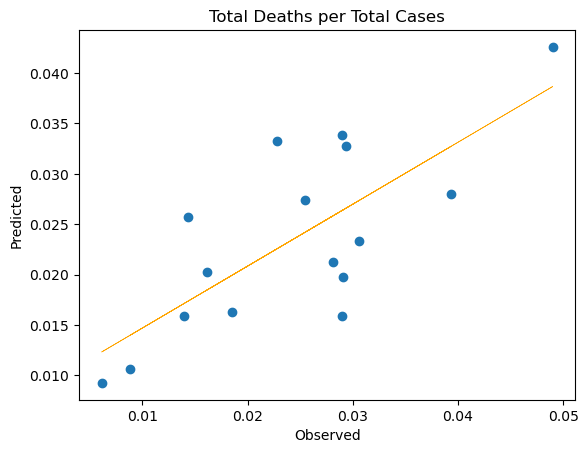

In [169]:
model = Lasso()
Lasso_reg= GridSearchCV(model, Lasso_parameters, scoring='neg_mean_squared_error',cv=5)
Lasso_reg.fit(x,y)
X_train, X_test, y_train, y_test = train_test_split(x,y)
model = Lasso_reg.best_estimator_
print(model)
model.fit(X_train, y_train)
rmse = mean_squared_error(model.predict(X_test), y_test, squared = False)
betas = model.coef_
print(rmse)
print(betas)
y_hat = model.predict(x)
r2 = r2_score(y,y_hat)
print(r2)

slope, intercept, r_value, p_value, std_err = stats.linregress(y,y_hat)
y_hat_plot = slope*y + intercept
plt.scatter(y,y_hat)
plt.plot(y, y_hat_plot, color='orange', linewidth=0.5)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Total Deaths per Total Cases')
plt.savefig('100 prediction vs observation.png')
plt.show()

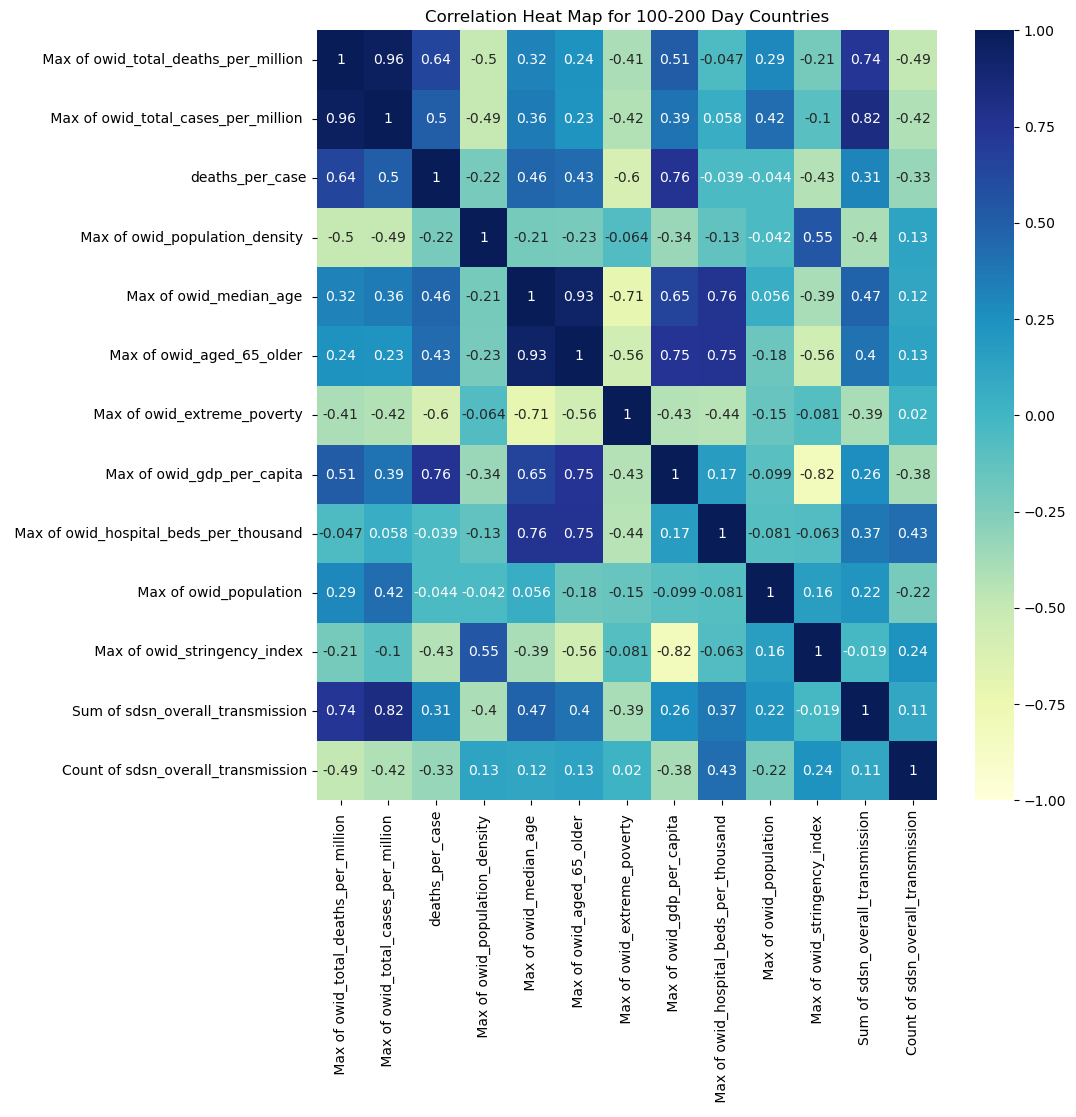

In [62]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

dataplot = sns.heatmap(df100.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title('Correlation Heat Map for 100-200 Day Countries')
plt.savefig('100 Correlation Map')
plt.show()

In [44]:
df0 = pd.read_csv('less than 100.csv')

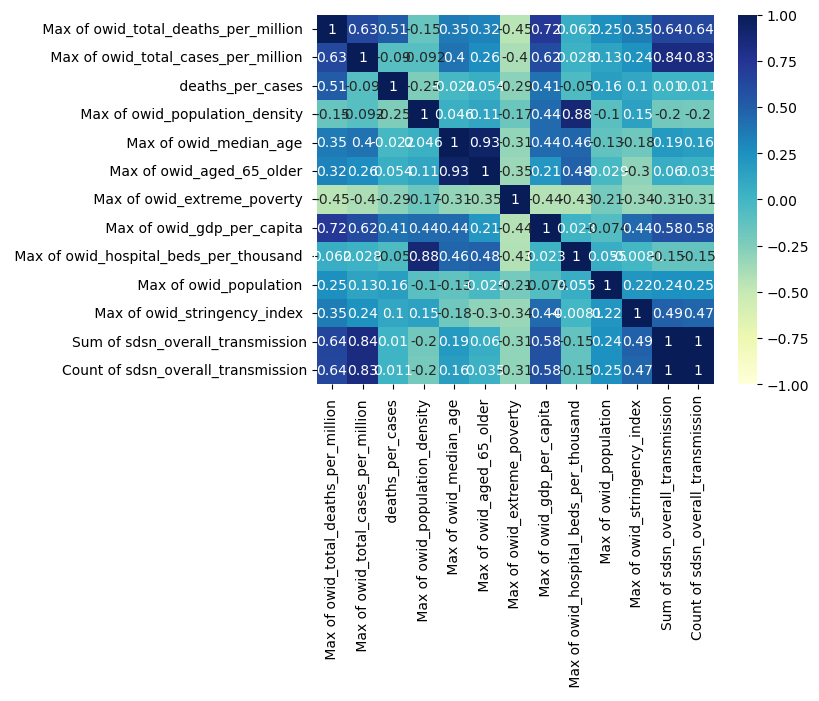

In [45]:
dataplot = sns.heatmap(df0.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.show()

In [149]:
frames = [clean_df100, clean_df200]
  
result = pd.concat(frames)

In [150]:
y = result['deaths_per_case'].to_numpy()
x1 = result[' Max of owid_population_density '].to_numpy().reshape(-1,1)
x2 = result[' Max of owid_median_age '].to_numpy().reshape(-1,1)
x3 = result[' Max of owid_gdp_per_capita '].to_numpy().reshape(-1,1)
x4 = result[' Max of owid_hospital_beds_per_thousand '].to_numpy().reshape(-1,1)
x5 = result[' Max of owid_stringency_index '].to_numpy().reshape(-1,1)
x6 = result['Sum of sdsn_overall_transmission'].to_numpy().reshape(-1,1)
x = np.concatenate([x1,x2,x3,x4,x5,x6], axis=1)


Lasso(alpha=0.40816327122448975)
0.01017167307364353
[-2.41046287e-06  0.00000000e+00 -8.33686286e-08 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00]
0.05976531906454008


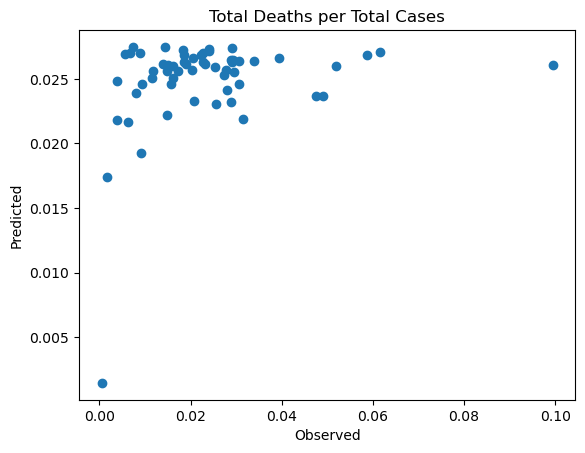

In [152]:
model = Lasso()
Lasso_reg= GridSearchCV(model, Lasso_parameters, scoring='neg_mean_squared_error',cv=5)
Lasso_reg.fit(x,y)
X_train, X_test, y_train, y_test = train_test_split(x,y)
model = Lasso_reg.best_estimator_
print(model)
model.fit(X_train, y_train)
rmse = mean_squared_error(model.predict(X_test), y_test, squared = False)
betas = model.coef_
print(rmse)
print(betas)
y_hat = model.predict(x)
r2 = r2_score(y,y_hat)
print(r2)
plt.scatter(y,y_hat)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Total Deaths per Total Cases')
plt.savefig('100 prediction vs observation.png')
plt.show()